## Loading library and data

To use the VitalDB open dataset, the pandas library is required.\
At first, we need to load 3 endpoints of the VitalDB open dataset.

In [1]:
import pandas as pd
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

### Using clinical information data
Let's visually check the cases and variables of the VitalDB dataset.

In [2]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15720,-1020,14940,1740,14640,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4440,-540,4260,-540,3960,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,21000,-720,20280,2580,18180,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21540,-960,22440,2640,21840,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15240,-240,15660,-240,15060,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19440,-660,19140,3540,18540,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12000,-540,12840,1740,12240,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


### Using track list data

In [3]:
df_trks

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
...,...,...,...
486444,6388,Solar8000/VENT_PIP,2d63adbc7e2653f14348e219816673cde3358cf6
486445,6388,Solar8000/VENT_PPLAT,6f6604255858ddc8f6a01b9f4774b0d43105f6da
486446,6388,Solar8000/VENT_RR,f34f3fae7fd963355c1c7060e1e876d20fa87536
486447,6388,Solar8000/VENT_SET_TV,4a4a55b8aebf9c76a4a76f62a7c1ec6fcb80e618


In [35]:
df_cases['optype'].unique()

array(['Colorectal', 'Stomach', 'Biliary/Pancreas', 'Vascular',
       'Major resection', 'Breast', 'Minor resection', 'Transplantation',
       'Hepatic', 'Thyroid', 'Others'], dtype=object)

手术类型：
1. colorectal: 结肠直肠的
2. stomach： 胃
3. biliary/pancreas: 胆、胰腺
4. vascular： 血管的
5. major resection：大切除
6. breast：胸部
7. minor resection： 小切除
8. transplantation： 器官移植
9. hepatic： 肝
10. thyroid: 甲状腺
11. others： 其他

In [42]:
ind = np.array(np.where(df_cases['optype']=='Vascular'))[0,:]
other_case = df_cases.iloc[ind,:]
other_case['opname'].unique()

array(['Aneurysmal repair', 'Aortorenal bypass', 'Ligation and stripping',
       'Arteriovenous fistula', 'Endarterectomy',
       'Removal of continuous ambulatory peritoneal dialysis catheter',
       'Embolectomy', 'Removal of complicated graft', 'Aortoiliac bypass',
       'Endovascular aneurysmal repair', 'Nephrectomy',
       'Percutaneous biopsy', 'Femoro-popliteal bypass',
       'Closure of arteriovenous fistula', 'Vascular bypass',
       'Arteriovenous fistula thrombectomy',
       'Resection of popliteal artery', 'Removal of permanent catheter',
       'Removal of Hickman catheter', 'Revision of arteriovenous fistula',
       'Resection of inferior vena cava', 'Vascular repair',
       'Ilioiliac bypass', 'Intra-abdominal arterial bypass graft',
       'Arteriovenous graft', 'Bleeding control', 'Femoro-femoral bypass',
       'Vessel graft', 'Insertion of permanent catheter',
       'Transposition of basilic vein for arteriovenous fistula',
       'Aortofemoral bypass', 'R

In [43]:
caseid_ecg2 = list(
    set(df_trks[df_trks['tname'] == 'SNUADC/ART']['caseid']) &
    set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid']) &
    set(df_trks[df_trks['tname'] == 'SNUADC/ECG_II']['caseid']) & 
    set(df_cases[df_cases['icu_days'] == 0]['caseid']) &
    set(df_cases[df_cases['death_inhosp'] == 0]['caseid']) &
    set(df_cases[df_cases['preop_ecg'] == 'Normal Sinus Rhythm']['caseid']) 
)
caseid_ecg5 = list(
    set(df_trks[df_trks['tname'] == 'SNUADC/ART']['caseid']) &
    set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid']) &
    set(df_trks[df_trks['tname'] == 'SNUADC/ECG_V5']['caseid']) &
    set(df_cases[df_cases['icu_days'] == 0]['caseid']) &
    set(df_cases[df_cases['death_inhosp'] == 0]['caseid']) &
    set(df_cases[df_cases['preop_ecg'] == 'Normal Sinus Rhythm']['caseid']) 
)
caseid_ecg2 = np.array(caseid_ecg2).reshape(-1,1)
caseid_ecg5 = np.array(caseid_ecg5).reshape(-1,1)
caseids = np.row_stack((caseid_ecg2,caseid_ecg5))
len(caseids)

3283

In [44]:
caseids

array([[   1],
       [   3],
       [  13],
       ...,
       [6127],
       [2044],
       [6143]])

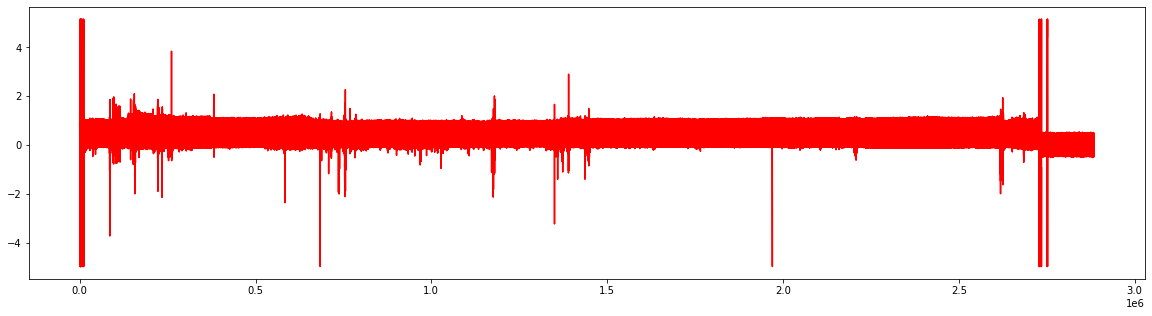

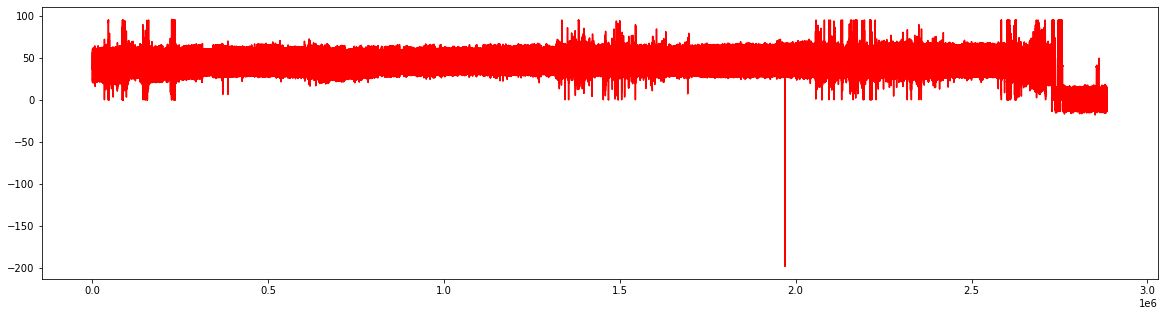

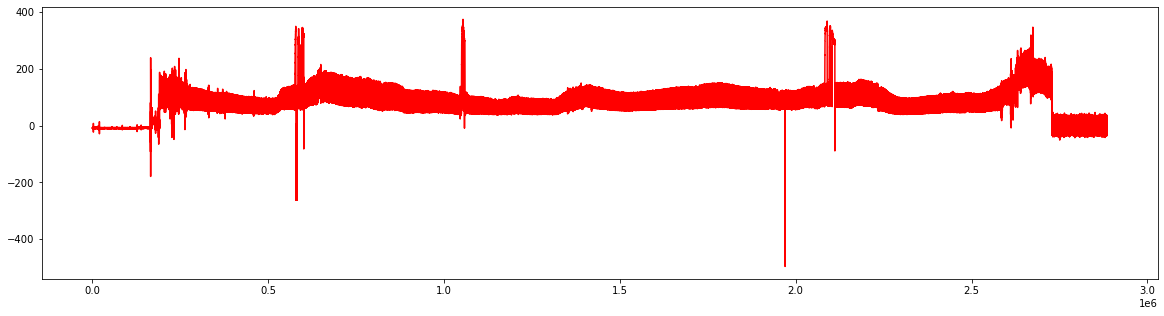

In [60]:
import vitaldb
vals = vitaldb.load_case(caseid = 1, tnames=['SNUADC/ECG_II','SNUADC/PLETH','SNUADC/ART'],interval = 1/250)
col_ind = np.zeros((np.size(vals,0),3))
for j in range(3):
    col = vals[:,j]
    for i in range(np.size(vals,0)):
        if np.isnan(col[i]):
            col_ind[i,j] = 0
        else:
            col_ind[i,j] = 1
ind = np.prod(col_ind,axis=1)
ind_keep = np.array(np.where(ind==1))[0,:]
vals = vals[ind_keep,:]
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 0], color='r')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(vals[:, 1], 'r')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(vals[:, 2], 'r')
plt.show()



In [61]:
df = pd.DataFrame(data=vals,index=None,columns=None)

In [63]:
compression_opts = dict(method='zip',
                        archive_name='2.csv')  
df.to_csv(r'D:\out.zip', index=False,
          compression=compression_opts)  

In [52]:
vals = vals[~np.isnan(vals)]

In [53]:
np.shape(vals)

(8655195,)

In [59]:
np.prod(col_ind,axis=1)

array([0., 0., 0., ..., 1., 1., 0.])